In [1]:
import numpy as np
from matplotlib import pyplot as plt
from scipy.spatial.distance import pdist

In [42]:
plt.style.use('dark_background')

In [3]:
ed=np.arange(start=0,stop=2,step=0.01)
cos_sim=np.abs(1-0.5*(ed**2))

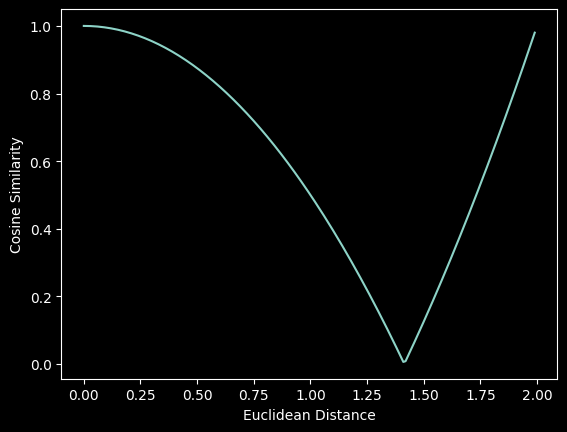

In [43]:
plt.plot(ed,cos_sim)
plt.xlabel('Euclidean Distance')
plt.ylabel("Cosine Similarity")
plt.show()

In [5]:
def calculate_similarity(x:np.ndarray)->np.ndarray:
    return np.abs(1-0.5*(x**2))

In [44]:
# for all real
def calc_pairwise_cosine_similarity(low,high,num_points,dims):
    data=[]
    distances=[]
    non_norm_dist=[]
    for i in dims:
        arr=np.random.uniform(low=low,high=high,size=[num_points,i])
        norms=np.linalg.norm(arr,ord=2,axis=1)
        normalized_arr=arr.T/norms
        dist=pdist(normalized_arr.T,metric='euclidean')
        non_norm_pdist=pdist(arr,metric='euclidean')
        non_norm_dist.append(non_norm_pdist)
        distances.append(dist)
        data.append(calculate_similarity(dist))
    return data,distances,non_norm_dist

In [45]:
cos_sim_all_real,distances_all_real,non_norm_dist_real=calc_pairwise_cosine_similarity(low=-1,high=1,num_points=1000,dims=list(range(2,103,10)))
cos_sim_pos_real,distances_pos_real,non_norm_dist_pos=calc_pairwise_cosine_similarity(low=0,high=1,num_points=1000,dims=list(range(2,103,10)))
cos_sim_neg_real,distances_neg_real,non_norm_dist_neg=calc_pairwise_cosine_similarity(low=-1,high=0,num_points=1000,dims=list(range(2,103,10)))

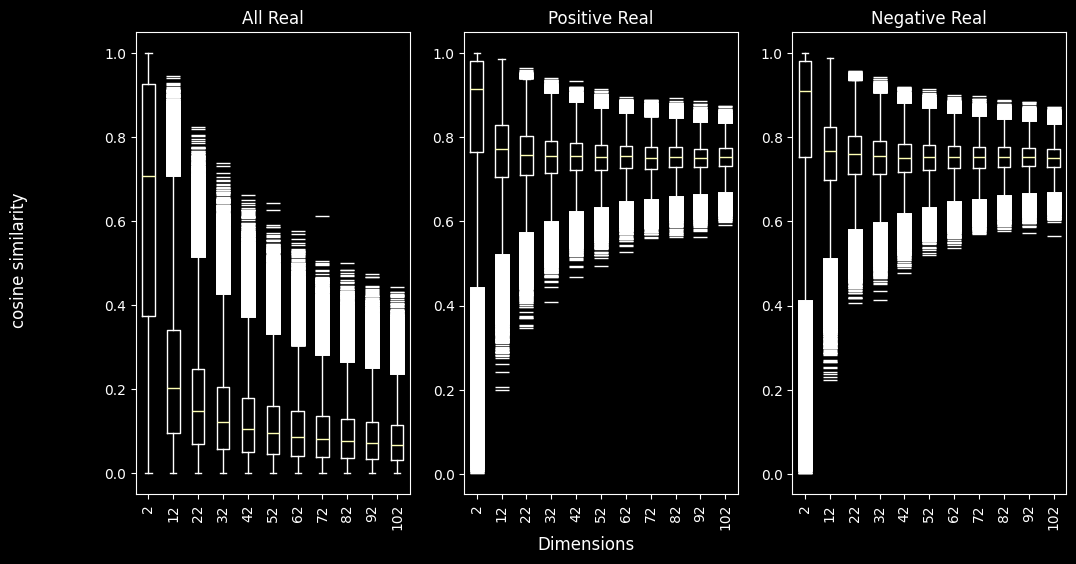

In [41]:
fig,ax=plt.subplots(1,3)
fig.set_figwidth(12)
fig.set_figheight(6)
fig.supxlabel('Dimensions')
fig.supylabel('cosine similarity')
ax[0].boxplot(x=cos_sim_all_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[0].set_title('All Real')
ax[0].set_xticklabels(range(2,103,10),rotation=90)
ax[1].boxplot(x=cos_sim_pos_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[1].set_xticklabels(range(2,103,10),rotation=90)
ax[1].set_title('Positive Real')
ax[2].boxplot(x=cos_sim_neg_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[2].set_xticklabels(range(2,103,10),rotation=90)
ax[2].set_title('Negative Real')
plt.show()

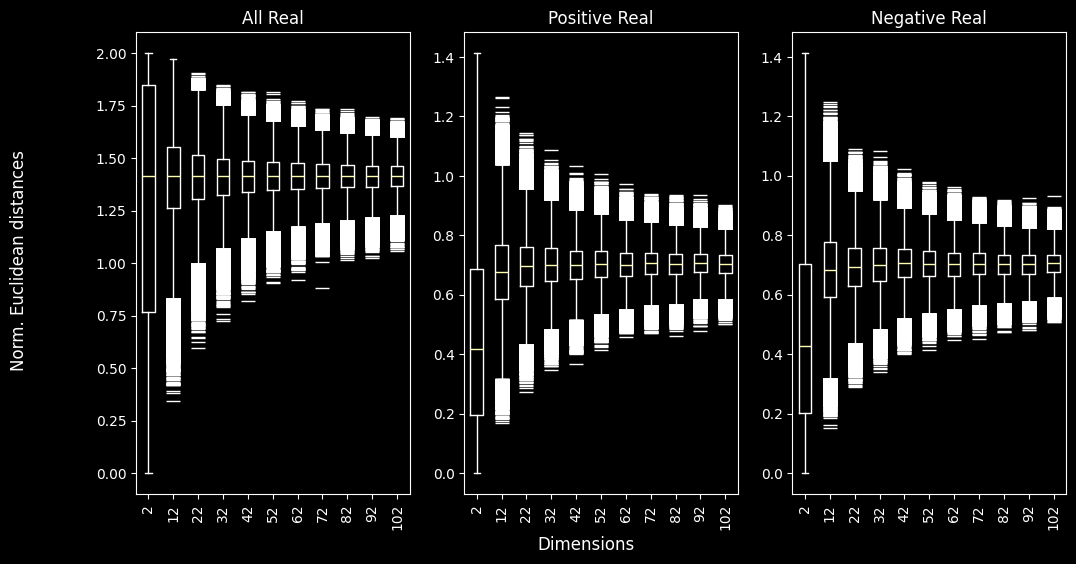

In [40]:
fig,ax=plt.subplots(1,3)
fig.set_figwidth(12)
fig.set_figheight(6)
fig.supxlabel('Dimensions')
fig.supylabel('Norm. Euclidean distances')
ax[0].boxplot(x=distances_all_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[0].set_title('All Real')
ax[0].set_xticklabels(range(2,103,10),rotation=90)
ax[1].boxplot(x=distances_pos_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[1].set_xticklabels(range(2,103,10),rotation=90)
ax[1].set_title('Positive Real')
ax[2].boxplot(x=distances_neg_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[2].set_xticklabels(range(2,103,10),rotation=90)
ax[2].set_title('Negative Real')
plt.show()

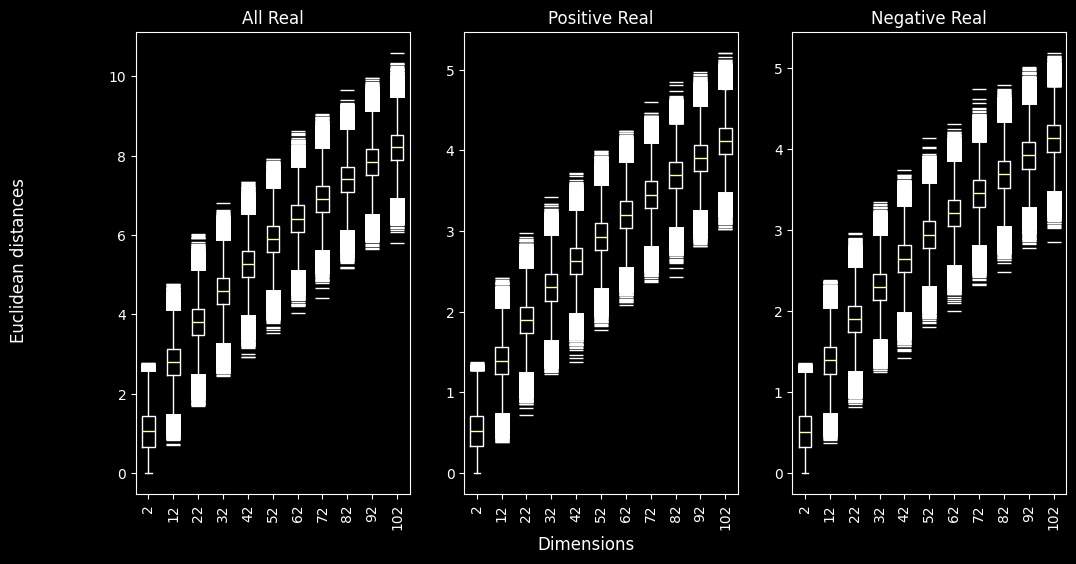

In [46]:
fig,ax=plt.subplots(1,3)
fig.set_figwidth(12)
fig.set_figheight(6)
fig.supxlabel('Dimensions')
fig.supylabel('Euclidean distances')
ax[0].boxplot(x=non_norm_dist_real,flierprops=dict(marker='_', color='red', markersize=10))
ax[0].set_title('All Real')
ax[0].set_xticklabels(range(2,103,10),rotation=90)
ax[1].boxplot(x=non_norm_dist_pos,flierprops=dict(marker='_', color='red', markersize=10))
ax[1].set_xticklabels(range(2,103,10),rotation=90)
ax[1].set_title('Positive Real')
ax[2].boxplot(x=non_norm_dist_neg,flierprops=dict(marker='_', color='red', markersize=10))
ax[2].set_xticklabels(range(2,103,10),rotation=90)
ax[2].set_title('Negative Real')
plt.show()